# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Multiple outputs from cell
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" 

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

# Clean the data

# Inspect loaded data

In [79]:
df_flights['DepDel15'].value_counts()

0.0    215038
1.0     54141
Name: DepDel15, dtype: int64

In [80]:
# Checking the data types of the data
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

# Identify and impute NaN values

In [81]:
df_flights.isnull().any()

Year                 False
Month                False
DayofMonth           False
DayOfWeek            False
Carrier              False
OriginAirportID      False
OriginAirportName    False
OriginCity           False
OriginState          False
DestAirportID        False
DestAirportName      False
DestCity             False
DestState            False
CRSDepTime           False
DepDelay             False
DepDel15              True
CRSArrTime           False
ArrDelay             False
ArrDel15             False
Cancelled            False
dtype: bool

In [82]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [83]:
df_flights['DepDel15'].value_counts()

0.0    215038
1.0     54141
Name: DepDel15, dtype: int64

In [84]:
df_flights.loc[df_flights['DepDel15'].isnull()].DepDelay.value_counts()

0    2761
Name: DepDelay, dtype: int64

In [85]:
df_flights.loc[(df_flights['DepDelay']<=15) & (df_flights['DepDel15'].isnull()), 'DepDel15'] = 0.0

In [86]:
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In [87]:
df_flights['DepDel15'].value_counts()

0.0    217799
1.0     54141
Name: DepDel15, dtype: int64

In [88]:
df_flights.loc[(df_flights['DepDelay']>15) & (df_flights['DepDel15'].isnull()), 'DepDel15'] = 1.0

In [89]:
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In [90]:
df_flights['DepDel15'].value_counts()

0.0    217799
1.0     54141
Name: DepDel15, dtype: int64

In [91]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           271940 non-null  float64
 16  CR

# Detect and Eliminate outliers in DepDelay and ArrDelay columns

In [92]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.199092,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.399318,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7fad87ba0f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fad87b916a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fad87ba0bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fad87b91dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fad87b87190>],
 'means': []}

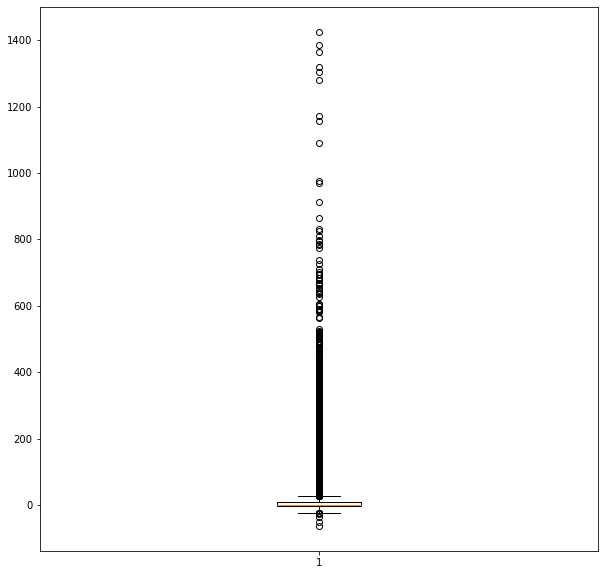

In [93]:
fig = plt.figure(figsize=(10,10))
var = df_flights['DepDelay']
plt.boxplot(var)


<Figure size 432x288 with 0 Axes>

(array([2.61701e+05, 9.23100e+03, 8.59000e+02, 9.70000e+01, 2.30000e+01,
        1.50000e+01, 5.00000e+00, 1.00000e+00, 2.00000e+00, 6.00000e+00]),
 array([ -63. ,   85.8,  234.6,  383.4,  532.2,  681. ,  829.8,  978.6,
        1127.4, 1276.2, 1425. ]),
 <BarContainer object of 10 artists>)

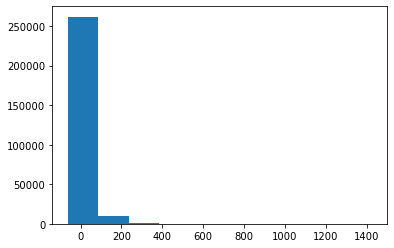

In [94]:
plt.figure()
plt.hist(df_flights['DepDelay'])
#histogram plot shows a right-skewed distribution

In [95]:
q01 = df_flights.DepDelay.quantile(0.01)
#q99 = df_flights.DepDelay.quantile(0.99)
df_flights = df_flights[(df_flights['DepDelay']>q01) & (df_flights['DepDelay']<8)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fad87a72820>,
 'caps': [<matplotlib.lines.Line2D at 0x7fad87a72f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fad87a72490>],
 'medians': [<matplotlib.lines.Line2D at 0x7fad87a7c6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fad87a7ca30>],
 'means': []}

Text(0.5, 1.0, 'Boxplot')

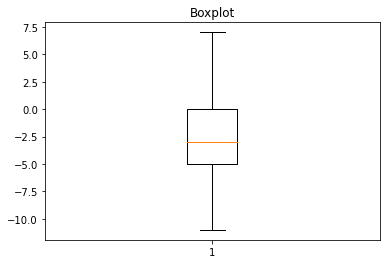

In [96]:
fig = plt.figure()
plt.boxplot(df_flights['DepDelay'])
plt.title('Boxplot')


<Figure size 432x288 with 0 Axes>

(array([6.9000e+01, 4.2540e+03, 9.7252e+04, 8.6092e+04, 6.7500e+03,
        8.9900e+02, 2.2800e+02, 7.1000e+01, 3.0000e+01, 7.0000e+00]),
 array([-75. , -52.3, -29.6,  -6.9,  15.8,  38.5,  61.2,  83.9, 106.6,
        129.3, 152. ]),
 <BarContainer object of 10 artists>)

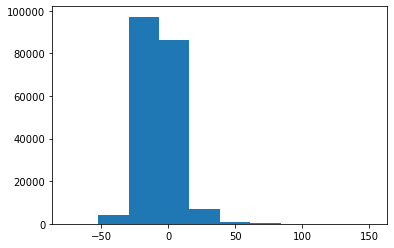

In [97]:
plt.figure()
plt.hist(df_flights['ArrDelay'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fad87944700>,
 'caps': [<matplotlib.lines.Line2D at 0x7fad87944e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fad87944370>],
 'medians': [<matplotlib.lines.Line2D at 0x7fad8794f580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fad8794f910>],
 'means': []}

Text(0.5, 1.0, 'Boxplot')

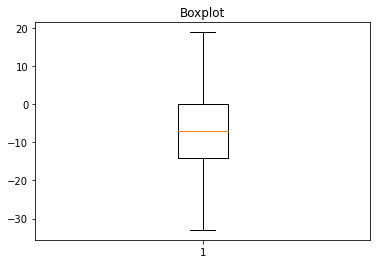

In [98]:
q01 = df_flights.ArrDelay.quantile(0.01)
q99 = df_flights.ArrDelay.quantile(0.99)
df_flights = df_flights[(df_flights['ArrDelay']>q01) & (df_flights['ArrDelay']<20)]
fig = plt.figure()
plt.boxplot(df_flights['ArrDelay'])
plt.title('Boxplot')

# EDA

In [100]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,188105.0,188105.000000,188105.000000,188105.000000,188105.000000,188105.000000,188105.000000,188105.000000,188105.0,188105.000000,188105.00000,188105.000000,188105.000000
mean,2013.0,7.031211,15.772287,3.902193,12769.052582,12720.895558,1258.030276,-2.433545,0.0,1441.723272,-7.09104,0.033721,0.015024
std,0.0,2.014389,8.879297,2.001582,1512.320844,1505.939869,470.733596,3.882760,0.0,484.237620,9.85408,0.180509,0.121647
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.0,1.000000,-33.00000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,837.000000,-5.000000,0.0,1040.000000,-14.00000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1215.000000,-3.000000,0.0,1425.000000,-7.00000,0.000000,0.000000
75%,2013.0,9.000000,24.000000,6.000000,14100.000000,14057.000000,1640.000000,0.000000,0.0,1833.000000,0.00000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,7.000000,0.0,2359.000000,19.00000,1.000000,1.000000


(array([ 5305., 11649., 23367., 36658., 19642., 36498., 26983., 11848.,
         8931.,  7224.]),
 array([-11. ,  -9.2,  -7.4,  -5.6,  -3.8,  -2. ,  -0.2,   1.6,   3.4,
          5.2,   7. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'DepDelay')

(array([ 3819.,  7588., 15720., 27513., 36875., 43174., 27560., 13970.,
         7355.,  4531.]),
 array([-33. , -27.8, -22.6, -17.4, -12.2,  -7. ,  -1.8,   3.4,   8.6,
         13.8,  19. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'ArrDelay')

Text(0.5, 0.98, 'Departure & Arrival Delays')

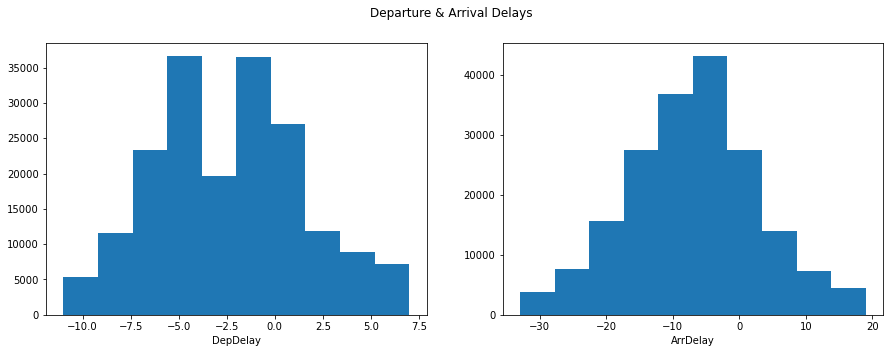

In [101]:
var1 = df_flights['DepDelay']
var2 = df_flights['ArrDelay']
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].hist(var1)
ax[0].set_xlabel('DepDelay')

ax[1].hist(var2)
ax[1].set_xlabel('ArrDelay')

fig.suptitle('Departure & Arrival Delays')

In [102]:
Avg_DepDelay = df_flights['DepDelay'].mean()
Avg_ArrDelay = df_flights['ArrDelay'].mean()
print(f'Avg_DepDelay: {Avg_DepDelay}, Avg_ArrDelay: {Avg_ArrDelay}')

Avg_DepDelay: -2.433545094495096, Avg_ArrDelay: -7.0910395789585605


<AxesSubplot:title={'center':'ArrDelay'}, xlabel='Carrier'>

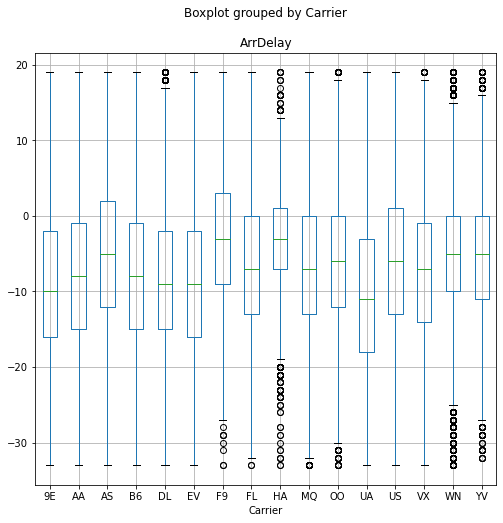

In [103]:
df_flights.boxplot(column='ArrDelay', by='Carrier', figsize=(8,8))

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DayOfWeek'>

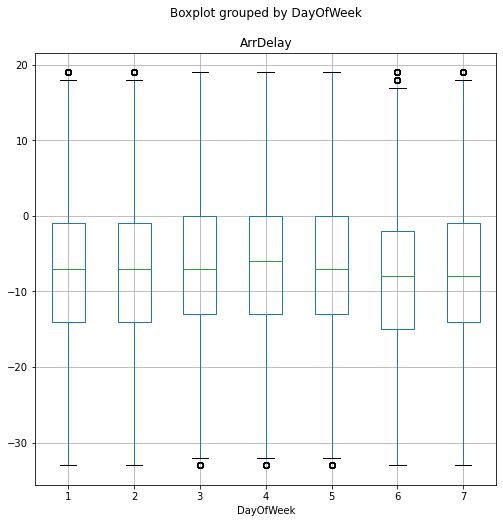

In [104]:
df_flights.boxplot(column='ArrDelay', by='DayOfWeek', figsize=(8,8))

# Which departure airport has the highest average departure delay?

<AxesSubplot:xlabel='OriginAirportName'>

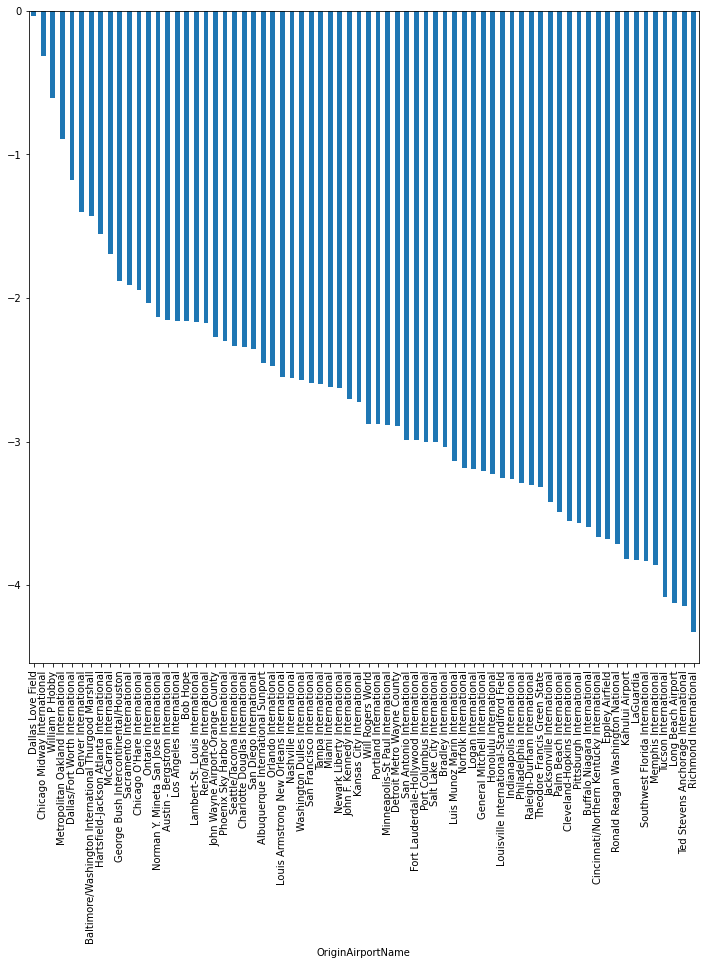

In [105]:
df_flight_depairport = df_flights.groupby('OriginAirportName')
df_mean_depdelay = df_flight_depairport['DepDelay'].mean().sort_values(ascending=False)
df_mean_depdelay.plot(kind='bar', figsize=(12,12))

<AxesSubplot:title={'center':'DepDelay'}, xlabel='OriginAirportName'>

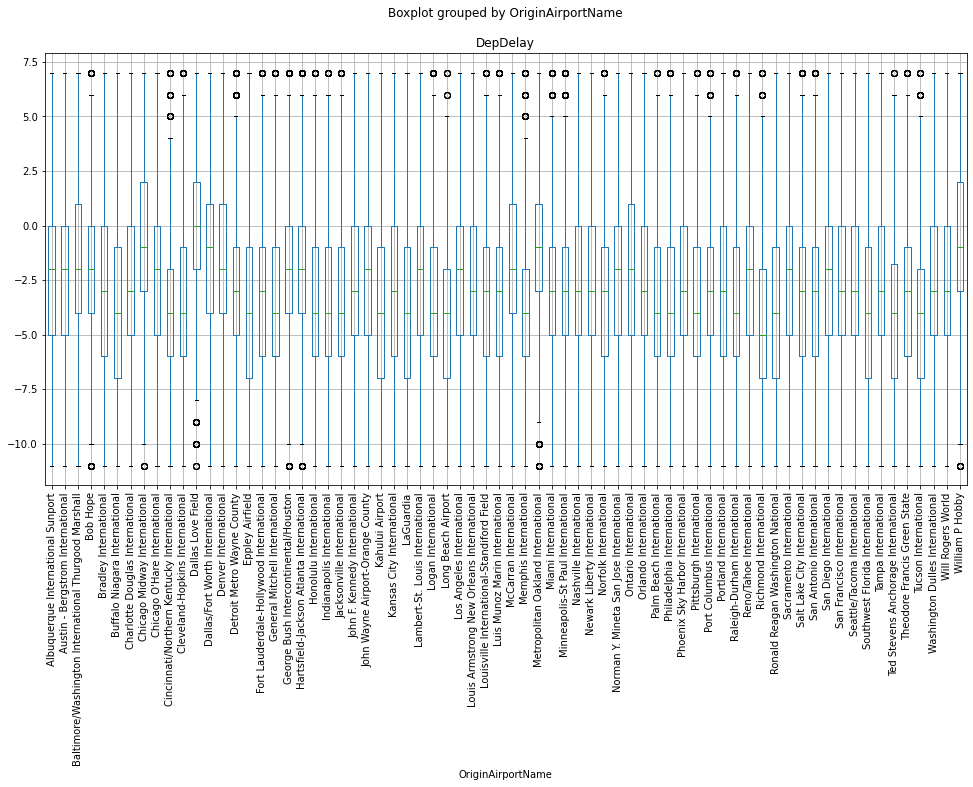

In [106]:
df_flights.boxplot(column='DepDelay', by='OriginAirportName', figsize=(16,8), rot=90)

# Do late departures tend to result in longer arrival delays than on-time departures?

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DepDelay'>

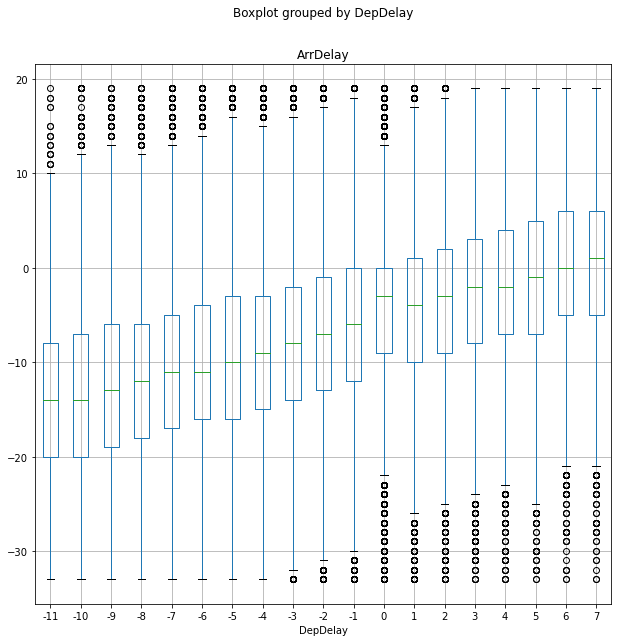

In [123]:
df_flights.boxplot(column='ArrDelay', by='DepDelay', figsize=(10,10))

# Which route (from origin airport to destination airport) has the most late arrivals?

In [140]:
df_routes = df_flights.groupby(['OriginAirportName', 'DestAirportName'])
most_route_delay = pd.DataFrame(df_routes['ArrDelay'].count())
most_route_delay.sort_values(by='ArrDelay', ascending=False)

ArrDelay
OriginAirportName                          DestAirportName                           
San Francisco International                Los Angeles International              679
Honolulu International                     Kahului Airport                        600
Kahului Airport                            Honolulu International                 579
Los Angeles International                  San Francisco International            567
                                           McCarran International                 494
...                                                                               ...
Metropolitan Oakland International         Logan International                      1
Southwest Florida International            Buffalo Niagara International            1
Cincinnati/Northern Kentucky International Phoenix Sky Harbor International         1
Logan International                        Port Columbus International              1
Cleveland-Hopkins International            Palm Beach International                 1

[2475 rows x 1 columns]

# Which route has the highest average arrival delay?

In [143]:
avg_route_delay = pd.DataFrame(df_routes['ArrDelay'].mean())
avg_route_delay.sort_values(by='ArrDelay', ascending=False)

,,ArrDelay
OriginAirportName,DestAirportName,
Cleveland-Hopkins International,Palm Beach International,18.000000
John F. Kennedy International,Louisville International-Standiford Field,18.000000
Cleveland-Hopkins International,Philadelphia International,10.000000
McCarran International,Louisville International-Standiford Field,9.800000
Sacramento International,Philadelphia International,8.000000
...,...,...
Chicago Midway International,John Wayne Airport-Orange County,-21.500000
John F. Kennedy International,San Antonio International,-22.181818
Denver International,Kahului Airport,-22.666667
